<a href="https://colab.research.google.com/github/reganmeloche/ML-from-scratch/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

Sources:
- https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
- https://www.udemy.com/course/machinelearning
- https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp

Suppose we have a classification problem with n different classes. Given a new instance/point, we want to classify it into one of these n classes.

The knn algorithm is fairly straightforward:
- We choose an integer k
- For the new point, we find the k nearest neighbours, using a distance measurement (e.g. Euclidean distance)
- For each class, count how many neighbours fall into that class
- Assign the new instance the majority class of the k nearest neighbours

No work is done until a prediction is required, so this is sometimes called a 'lazy learning' method. May be useful or detrimental, depending on the application.

KNN can also be used for regression by taking the average of returned results.

Pros:
- Very simple
- Basically no training involved
- Works with multiple classes
- Few parameters (k and distance metric)
- Easy to add more data

Cons:
- High prediction cost (sorting, etc)
- Bad with higher dimensional data
- Categorical features don't work as well


## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

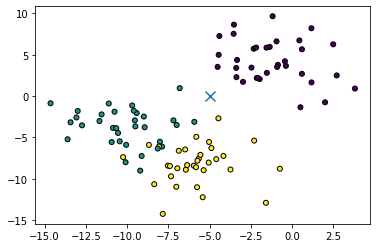

In [ ]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=2.5, random_state=1)

new_point = [-5,0]

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.scatter(new_point[0], new_point[1], marker='x', s=100 )
plt.show()

We need to do the following:
- Write a simple function to calculate Euclidean distance between two points
- Write a function that finds the k nearest neighbours to a new point given a set of existing data

We can then visualize the k nearest neighbours. We then simply count how many of these neighbours belong to each category and take the one with the most.

In [ ]:
def euclidean_distance(a, b):
    d = 0
    for x,y in zip(a,b):
        d += (x - y)**2

    return math.sqrt(d) 

In [ ]:
def get_k_nearest_neighbours(train_data, new_x, k):
    distances = []

    for row in train_data:
        next_dist = euclidean_distance(row[0:-1], new_x)
        distances.append((row, next_dist))
    
    distances.sort(key=lambda x: x[1])

    k_list = [d[0] for d in distances[0:k]]

    return np.array(k_list)


In [ ]:
train_data = np.concatenate((X, np.transpose([y])), axis=1)
k_list = get_k_nearest_neighbours(train_data, [-5,0], 8)

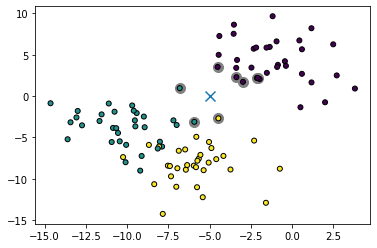

In [ ]:
plt.scatter(k_list[:,0], k_list[:,1], marker='o', s=100, c='grey' )
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.scatter(new_point[0], new_point[1], marker="x", s=100)
plt.show()

In [ ]:
def knn_predict(train_data, new_x, k):
    neighbors = get_k_nearest_neighbours(train_data, new_x, k)
    y_vals = output_values = [a[-1] for a in neighbors]
    pred = max(set(y_vals), key=y_vals.count)
    return int(pred)
    

In [ ]:
train_data = np.concatenate((X, np.transpose([y])), axis=1)

for k in range(1,10):
    pred = knn_predict(train_data, new_point, 5)
    print(k, pred)

1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


## KNN Classifier

In [ ]:
class MyKNN:
    def __init__(self, k):
        self.__k = k
        self.__train_data = None
    
    def fit(self, X, y):
        self.__train_data = np.concatenate((X, np.transpose([y])), axis=1)
    
    def predict(self, X):
        return [
            knn_predict(self.__train_data, x, self.__k) for x in X
         ]
        


## Evaluation and Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [ ]:
my_knn = MyKNN(5)

my_knn.fit(X_train, y_train)

y_pred = my_knn.predict(X_test)

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Comparison with sklearn
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)

print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

